
Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     R1 = 9.00e+00 [Ohm]
  CPE1_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []

Fit parameters:
     R0 = 6.60e+00  (+/- 5.21e-02) [Ohm]
     R1 = 8.36e+00  (+/- 9.18e-02) [Ohm]
  CPE1_0 = 1.91e-04  (+/- 1.76e-05) [Ohm^-1 sec^a]
  CPE1_1 = 7.72e-01  (+/- 1.15e-02) []


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     R1 = 9.00e+00 [Ohm]
  CPE1_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []

Fit parameters:
     R0 = 5.07e+00  (+/- 4.54e-02) [Ohm]
     R1 = 9.75e+00  (+/- 7.42e-02) [Ohm]
  CPE1_0 = 3.69e-04  (+/- 2.23e-05) [Ohm^-1 sec^a]
  CPE1_1 = 8.17e-01  (+/- 9.06e-03) []


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     R1 = 9.00e+00 [Ohm]
  CPE1_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []

Fit parameters:
     R0 = 5.25e+00  (+/- 3.94e-02) [Ohm]
     R1 = 1.97e+01  (+/- 7.24e-02) [Ohm]
  CPE1_0 = 2.07e-04 

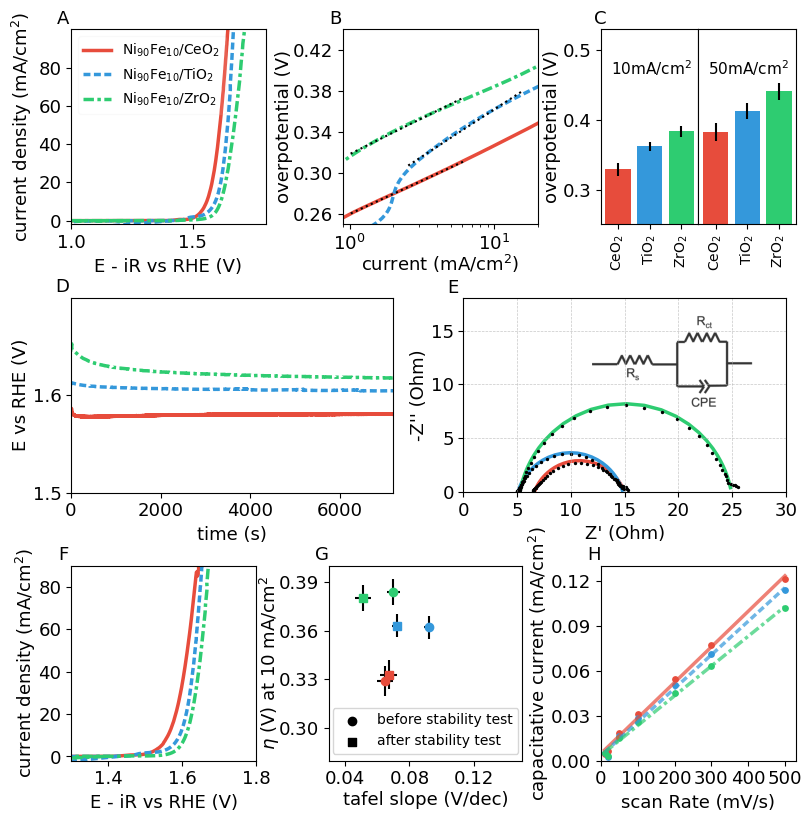

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import pandas as pd
from impedance.models.circuits import CustomCircuit
from impedance import preprocessing
import gc
from scipy.optimize import curve_fit

def linear_model(x, m, b):
    return m * x + b

length = 8
height = 8

axes_l1 = 1.95
axes_l4 = axes_l1*1.5+0.3
axes_l6 = axes_l1*1.2
axes_l8a = axes_l1*0.4

axes_w1 = axes_l1
axes_w8a = axes_l1*0.4

x_offset = 0.7
y_offset = axes_w1/4

label_font = 13
tick_font = 13
legend_font = 10

linewidth = 2.5

range_min = 10**(0)
range_max = 10**(0.8)

fig = plt.figure(figsize=(length, height))

plt.rcParams['xtick.labelsize'] = tick_font
plt.rcParams['ytick.labelsize'] = tick_font

axes1 = fig.add_axes([(x_offset)/length, \
                      (4*y_offset+2*axes_w1)/height, axes_l1/(length), axes_w1/(height)])  # top-left
axes2 = fig.add_axes([(2.1*x_offset+axes_l1)/length, \
                      (4*y_offset+2*axes_w1)/height, axes_l1/(length), axes_w1/(height)])  # top-center
axes3a = fig.add_axes([(3*x_offset+2*axes_l1)/length, \
                      (4*y_offset+2*axes_w1)/height,  0.5*axes_l1/(length), axes_w1/(height)])  # top-right
axes3b = fig.add_axes([(3*x_offset+2.5*axes_l1)/length, \
                      (4*y_offset+2*axes_w1)/height,  0.5*axes_l1/(length), axes_w1/(height)])  # top-right
axes4 = fig.add_axes([(x_offset)/length, \
                      (2.5*y_offset+axes_w1)/height, (axes_l4)/(length), axes_w1/(height)])  # middle-left
axes5 = fig.add_axes([(2*x_offset+1*axes_l4)/length, \
                      (2.5*y_offset+1*axes_w1)/height,  axes_l4/(length), axes_w1/(height)])  # middle-right
axes6 = fig.add_axes([(x_offset)/length, \
                      (1*y_offset)/height, axes_l1*0.95/(length), axes_w1/(height)])  # bottom-left
axes7 = fig.add_axes([(1.9*x_offset+axes_l1)/length, \
                      (1*y_offset)/height, axes_l1*0.99/(length), axes_w1/(height)])  # bottom-center
axes8 = fig.add_axes([(3*x_offset+2*axes_l1)/length, \
                      (1*y_offset)/height, axes_l1/(length), axes_w1/(height)])  # bottom-right


for axes in fig.axes:
    axes.set_xticks([]) 
    axes.set_yticks([])

# axes 1 and 2 - linear sweep voltammetry and Tafel plot

filenames=[['Activity_1/CeO2_Activity_1.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c']]

tafel_eta_file = open('tafel_eta_file.txt', 'w')

for filename, label, color in filenames:
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    voltage = np.array(data.iloc[:,0]+0.059*14+0.098) # voltage in V
    current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2

    #iR correction - average solution resistance obtained from Nyquist fit is substracted

    voltage = voltage - current_density*0.196*6.48*0.001
    
    axes1.plot(voltage[0:voltage.argmax()],current_density[0:voltage.argmax()],\
             label=label,linewidth = linewidth, color=color)
    eta_10 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10)))].flatten()) - 1.23, 3)
    eta_50 = round(np.interp(50, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 50))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 50))).flatten()]) - 1.23, 3)

    overpotential_full = voltage[0:voltage.argmax()] - 1.23
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > range_min) & (current_density < range_max)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    # uncertainty in overpotential estimated through propagation of error
    overpotential_error = 0.009 

    popt, pcov = curve_fit(
        linear_model, 
        log_current_density, 
        overpotential, 
        sigma=np.full_like(log_current_density, overpotential_error), 
        absolute_sigma=True
    )

    slope, intercept = popt
    slope_error, intercept_error = np.sqrt(np.diag(pcov))

    # Round the results
    slope = round(slope, 3)
    slope_error = round(slope_error, 3)
    tafel_eta_file.write(label+'\t'+str(slope)+'\t'+str(eta_10)+'\t'+str(eta_50)+'\t'+color+'\t'+str(slope_error)+'\t'+str(overpotential_error)+'\t'+str(0.013)+'\n')
    axes2.plot(current_density[range], \
               intercept+0.000 + slope * log_current_density, label=label,color = 'black',\
               zorder = 1, linestyle = 'dotted')
    axes2.plot(current_density[(current_density > 0) & (current_density < 10**(2))], \
               overpotential_full[(current_density > 0) & (current_density < 10**(2))], color = color,linewidth = linewidth, zorder = 0)

filenames=[['Activity_1/TiO2_Activity_1.mpt','Ni$_{90}$Fe$_{10}$/TiO$_2$','#3498db',5.0,(0, (2, 1, 2, 1))]]

for filename, label, color, resistance, linestyle in filenames:

    data = pd.read_csv(filename, delimiter='\t', decimal=',', skiprows=61, encoding='ISO-8859-1')
    voltage = np.array(data[['Ewe/V']]+0.059*14+0.098) # voltage in V
    current_density=np.array(data[['<I>/mA']]/0.196) # current density in mA/cm^2

    # iR correction - average solution resistance obtained from Nyquist fit is substracted

    voltage = voltage - current_density*0.196*resistance*0.001
    
    axes1.plot(voltage[0:voltage.argmax()],current_density[0:voltage.argmax()],\
             label=label,linestyle = linestyle, linewidth = linewidth,color=color)
    eta_10 = round(np.interp(10, current_density[np.abs(current_density-10)<0.2].flatten(),\
                             voltage[np.abs(current_density-10)<0.2].flatten()) - 1.23, 3)
    eta_50 = round(np.interp(50, current_density[np.abs(current_density-50)<0.2].flatten(),\
                             voltage[np.abs(current_density-50)<0.2].flatten()) - 1.23, 3)

    overpotential_full = voltage[0:voltage.argmax()] - 1.23
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > 10**0.4) & (current_density < 10**1.2)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    
    overpotential_error = 0.007 

    popt, pcov = curve_fit(
        linear_model, 
        log_current_density, 
        overpotential, 
        sigma=np.full_like(log_current_density, overpotential_error),  # same error for each point
        absolute_sigma=True
    )

    slope, intercept = popt
    slope_error, intercept_error = np.sqrt(np.diag(pcov))
    slope = round(slope, 3)
    slope_error = round(slope_error, 3)
    
    tafel_eta_file.write(label+'\t'+str(slope)+'\t'+str(eta_10)+'\t'+str(eta_50)+'\t'+color+'\t'+str(slope_error)+'\t'+str(overpotential_error)+'\t'+str(0.012)+'\n')
    axes2.plot(current_density[range], \
               intercept+0.000 + slope * log_current_density, label=label,color = 'black',\
               zorder = 1, linestyle = 'dotted')
    axes2.plot(current_density[(current_density > 0) & (current_density < 10**(2))], \
               overpotential_full[(current_density > 0) & (current_density < 10**(2))], color = color,linestyle = linestyle, linewidth = linewidth, zorder = 0)
    
filenames=[['Activity_1/ZrO2_Activity_1.mpt','Ni$_{90}$Fe$_{10}$/ZrO$_2$','#2ecc71',5.0,(0, (3, 1, 1, 1))]]

for filename, label, color, resistance, linestyle in filenames:

    data = pd.read_csv(filename, delimiter='\t', decimal=',', skiprows=61, encoding='ISO-8859-1')
    voltage = np.array(data[['Ewe/V']]+0.059*14+0.098) # voltage in V
    current_density=np.array(data[['<I>/mA']]/0.196) # current density in mA/cm^2

    # iR correction - average solution resistance obtained from Nyquist fit is substracted

    voltage = voltage - current_density*0.196*resistance*0.001
    
    axes1.plot(voltage[0:voltage.argmax()],current_density[0:voltage.argmax()],\
             label=label,linestyle = linestyle, linewidth = linewidth,color=color)
    eta_10 = round(np.interp(10, current_density[np.abs(current_density-10)<0.2].flatten(),\
                             voltage[np.abs(current_density-10)<0.2].flatten()) - 1.23, 3)
    eta_50 = round(np.interp(50, current_density[np.abs(current_density-50)<0.2].flatten(),\
                             voltage[np.abs(current_density-50)<0.2].flatten()) - 1.23, 3)

    overpotential_full = voltage[0:voltage.argmax()] - 1.23
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > range_min) & (current_density < range_max)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    overpotential_error = 0.008 

    popt, pcov = curve_fit(
        linear_model, 
        log_current_density, 
        overpotential, 
        sigma=np.full_like(log_current_density, overpotential_error),  # same error for each point
        absolute_sigma=True
    )

    slope, intercept = popt
    slope_error, intercept_error = np.sqrt(np.diag(pcov))
    slope = round(slope, 3)
    slope_error = round(slope_error, 3)
    
    tafel_eta_file.write(label+'\t'+str(slope)+'\t'+str(eta_10)+'\t'+str(eta_50)+'\t'+color+'\t'+str(slope_error)+'\t'+str(overpotential_error)+'\t'+str(0.012)+'\n')
    axes2.plot(current_density[range], \
               intercept+0.000 + slope * log_current_density, label=label,color = 'black',\
               zorder = 1, linestyle = 'dotted')
    axes2.plot(current_density[(current_density > 0) & (current_density < 10**(2))], \
               overpotential_full[(current_density > 0) & (current_density < 10**(2))], color = color,linestyle = linestyle, linewidth = linewidth, zorder = 0)

tafel_eta_file.close()

axes1.xaxis.set_major_locator(ticker.AutoLocator())
axes1.yaxis.set_major_locator(ticker.AutoLocator())
axes1.set_xlim(1.0,1.8)
axes1.set_ylim(-2,100)

axes1.legend(fontsize=legend_font, framealpha=0.1, loc='upper left')

axes1.set_xlabel('E - iR vs RHE (V)',fontsize=label_font)
axes1.set_ylabel('current density (mA/cm$^2$)',fontsize=label_font, labelpad=3)
axes1.set_yticks([0,20,40,60,80])

axes2.set_xscale('log')
axes2.set_xlabel('current (mA/cm$^2$)',fontsize=label_font, labelpad=-1)
axes2.xaxis.set_major_locator(ticker.AutoLocator())
axes2.yaxis.set_major_locator(ticker.AutoLocator())
axes2.set_xlim(0.9,20)
axes2.set_ylim(0.25,0.44)
axes2.set_xticks([1,10])
axes2.set_yticks([0.26, 0.30, 0.34, 0.38, 0.42])

axes2.set_ylabel('overpotential (V)',fontsize=label_font, labelpad=0)

# axes 3 - overpotential hostogram

filename = 'tafel_eta_file.txt'
data = pd.read_csv(filename,delimiter='\t',header=None)

data.iloc[:,0] = ['CeO$_2$', 'TiO$_2$', 'ZrO$_2$']

colors_for_axes3a = ['#e74c3c', '#3498db', '#2ecc71']  # Example colors for axes3a
colors_for_axes3b = ['#e74c3c', '#3498db', '#2ecc71']  # Example colors for axes3b


axes3a.bar(data.iloc[:,0],data.iloc[:,2].astype(float), yerr = data.iloc[:,6].astype(float),color=colors_for_axes3a,label='10 mA/cm$^2$')
axes3a.set_ylim(0.25,0.53)
axes3a.set_ylabel('overpotential (V)',fontsize=label_font, labelpad=1)

axes3a.xaxis.set_major_locator(ticker.AutoLocator())
axes3a.yaxis.set_major_locator(ticker.AutoLocator())

axes3a.set_xticks(data.iloc[:,0])
axes3a.set_xticklabels(data.iloc[:,0], rotation=90,size=10)

axes3a.text(0.1, 0.85, '10mA/cm$^2$', ha='left', va='top', transform=axes3a.transAxes, fontsize=11)
axes3b.text(0.1, 0.85, '50mA/cm$^2$', ha='left', va='top', transform=axes3b.transAxes, fontsize=11)

axes3b.bar(data.iloc[:,0],data.iloc[:,3].astype(float), yerr = data.iloc[:,7].astype(float), color=colors_for_axes3b,label='50 mA/cm$^2$')
axes3b.set_ylim(0.25,0.53)
axes3b.set_xticks(data.iloc[:,0])
axes3b.set_xticklabels(data.iloc[:,0], rotation=90,size=10)


# axis 4 - stability studies


filenames=[['Stability/CeO2_stability.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c']]

for filename, label, color in filenames:
    
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    time_sec=data.iloc[:,0] # time in seconds
    voltage = data.iloc[:,1]+0.059*14+0.098
    
    axes4.plot(time_sec[2:],voltage[2:],\
                label=label, linewidth = linewidth,color=color)

filenames=[['Stability/TiO2_stability.mpt','Ni$_{90}$Fe$_{10}$/TiO$_2$','#3498db', (0,(2,1))],\
           ['Stability/ZrO2_stability.mpt','Ni$_{90}$Fe$_{10}$/ZrO$_2$','#2ecc71', (0, (3, 1, 1, 1))]]

for filename, label, color, linestyle in filenames:
    
    data = pd.read_csv(filename, delimiter='\t', decimal=',', skiprows=54, encoding='ISO-8859-1')
    time_sec = (pd.to_datetime(data['time/s']) - pd.to_datetime(data['time/s'].iloc[0])).dt.total_seconds()
    voltage = data['<Ewe/V>']+0.059*14+0.098
    
    t_uniform = np.linspace(time_sec.min(), time_sec.max(), 7200)

    voltage = np.interp(t_uniform, time_sec, voltage)
    axes4.plot(t_uniform[2:],voltage[2:],linestyle = linestyle,\
                label=label,linewidth = linewidth,color=color)

axes4.xaxis.set_major_locator(ticker.AutoLocator())
axes4.yaxis.set_major_locator(ticker.AutoLocator())
axes4.set_xlim(0.0,7200)
axes4.set_ylim(1.5,1.7)

axes4.set_xlabel('time (s)',fontsize=label_font)
axes4.set_ylabel('E vs RHE (V)',fontsize=label_font, labelpad=2)

axes4.set_yticks([1.5,1.6])

# for axes 5 - Nyquist plot

filenames=[['EIS_1/CeO2_EIS_1.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c']]

for filename, label, color in filenames:
    
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    data = data[data.iloc[:, 0] >= 10]
    Zreal=data.iloc[:,1]
    Zimg=data.iloc[:,2]
    frequencies = data.iloc[:,0]
    Z = Zreal - 1j*Zimg
    frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
    circuit = 'R0-p(R1,CPE1)'

    initial_guess = [7, 9, 0.01,0.9]  # Example initial guesses [R0, R1, Q, n]
    model = CustomCircuit(circuit, initial_guess=initial_guess)
    model.fit(frequencies, Z)
    print(model)
    Z_predicted = model.predict(frequencies)
    
    axes5.plot(Z_predicted.real,-1*Z_predicted.imag,\
                label=label,zorder = 0, linewidth = linewidth,color=color)
    axes5.scatter(Zreal,Zimg,\
                s=2,zorder = 1, color='black')

filenames=[['EIS_1/TiO2_EIS_1.mpt','Ni$_{90}$Fe$_{10}$/TiO$_2$','#3498db', (0,(2,1))],\
          ['EIS_1/ZrO2_EIS_1.mpt','Ni$_{75}$Fe$_{25}$/ZrO$_2$','#2ecc71', (0, (3, 1, 1, 1))]]

for filename, label, color, linestyle in filenames:
    
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=66,header=None,encoding='ISO-8859-1')
    data = data[data.iloc[:, 0] >= 1]
    Zreal=data.iloc[:,1]
    Zimg=data.iloc[:,2]
    frequencies = data.iloc[:,0]
    Z = Zreal - 1j*Zimg
    frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
    circuit = 'R0-p(R1,CPE1)'

    initial_guess = [7, 9, 0.01,0.9]  # Example initial guesses [R0, R1, Q, n]
    model = CustomCircuit(circuit, initial_guess=initial_guess)
    model.fit(frequencies, Z)
    print(model)
    Z_predicted = model.predict(frequencies)
    
    axes5.plot(Z_predicted.real,-1*Z_predicted.imag,\
                label=label,zorder = 0, linewidth = linewidth,color=color)
    axes5.scatter(Zreal,Zimg,\
                s=2,zorder = 1, color='black')

axes5.set_xlabel('Z\' (Ohm)',fontsize=label_font)
axes5.set_ylabel('-Z\'\' (Ohm)',fontsize=label_font, labelpad=2)

circuit_image = mpimg.imread('circuit.png')
xpos = 12
ypos = 7
xlength = 15
ylength = xlength*481/719
axes5.imshow(circuit_image, aspect='auto', extent=[xpos, xpos + xlength, ypos, ypos + ylength], alpha=0.8)

axes5.xaxis.set_major_locator(ticker.AutoLocator())
axes5.yaxis.set_major_locator(ticker.AutoLocator())
axes5.set_xticks([0, 5, 10, 15, 20, 25, 30])
axes5.set_yticks([0, 5, 10, 15])
axes5.set_xlim(0,30)
axes5.set_ylim(0,18)
axes5.set_aspect('equal')

axes5.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# axes 6 - post stability LSV

filenames=[['Activity_2/CeO2_activity_2.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c', 6.48]]

tafel_eta_file = open('tafel_eta_file_after_stability.txt', 'w')

for filename, label, color, resistance in filenames:
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    
    voltage = np.array(data.iloc[:,0]+0.059*14+0.098)  #voltage in V
    current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2

    # iR correction --> V=V_0-iR where R= avg.solution resistance obtained from Nyquist plot below
    
    voltage= voltage-current_density*0.196*resistance*0.001
    
    axes6.plot(voltage[0:voltage.argmax()],current_density[0:voltage.argmax()],\
             label=label, linewidth = linewidth,color=color)
    eta_10 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)
    eta_50 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)

    overpotential_full = voltage[0:voltage.argmax()] - 1.23
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > range_min) & (current_density < range_max)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    overpotential_error = 0.009 

    popt, pcov = curve_fit(
        linear_model, 
        log_current_density, 
        overpotential, 
        sigma=np.full_like(log_current_density, overpotential_error), 
        absolute_sigma=True
    )

    slope, intercept = popt
    slope_error, intercept_error = np.sqrt(np.diag(pcov))

    # Round the results
    slope = round(slope, 3)
    slope_error = round(slope_error, 3)
    tafel_eta_file.write(label+'\t'+str(slope)+'\t'+str(eta_10)+'\t'+str(eta_50)+'\t'+color+'\t'+str(slope_error)+'\t'+str(overpotential_error)+'\t'+str(0.013)+'\n')
    

filenames=[['Activity_2/TiO2_activity_2.txt','Ni$_{90}$Fe$_{10}$/TiO$_2$','#3498db', 5.2, (0,(2,1))]]

for filename, label, color, resistance, linestyle in filenames:
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    
    voltage = np.array(data.iloc[:,0]+0.059*14+0.098)  #voltage in V
    current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2

    # iR correction --> V=V_0-iR where R= avg.solution resistance obtained from Nyquist plot below
    
    voltage= voltage-current_density*0.196*resistance*0.001
    
    axes6.plot(voltage[0:voltage.argmax()],current_density[0:voltage.argmax()],\
             label=label, linestyle = linestyle, linewidth = linewidth,color=color)
    eta_10 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)
    eta_50 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)

    overpotential_full = voltage[0:voltage.argmax()] - 1.23
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > 10**0.4) & (current_density < 10**1.2)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    overpotential_error = 0.007 

    popt, pcov = curve_fit(
        linear_model, 
        log_current_density, 
        overpotential, 
        sigma=np.full_like(log_current_density, overpotential_error),  # same error for each point
        absolute_sigma=True
    )

    slope, intercept = popt
    slope_error, intercept_error = np.sqrt(np.diag(pcov))
    slope = round(slope, 3)
    slope_error = round(slope_error, 3)
    
    tafel_eta_file.write(label+'\t'+str(slope)+'\t'+str(eta_10)+'\t'+str(eta_50)+'\t'+color+'\t'+str(slope_error)+'\t'+str(overpotential_error)+'\t'+str(0.012)+'\n')

filenames=[['Activity_2/ZrO2_ACTIVITY_2.txt','Ni$_{90}$Fe$_{10}$/ZrO$_2$','#2ecc71', 5.2,  (0, (3, 1, 1, 1))]]

for filename, label, color, resistance, linestyle in filenames:
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    
    voltage = np.array(data.iloc[:,0]+0.059*14+0.098)  #voltage in V
    current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2

    # iR correction --> V=V_0-iR where R= avg.solution resistance obtained from Nyquist plot below
    
    voltage= voltage-current_density*0.196*resistance*0.001
    
    axes6.plot(voltage[0:voltage.argmax()],current_density[0:voltage.argmax()],\
             label=label, linestyle = linestyle, linewidth = linewidth,color=color)
    eta_10 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)
    eta_50 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)

    overpotential_full = voltage[0:voltage.argmax()] - 1.23
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > range_min) & (current_density < range_max)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > range_min) & (current_density < range_max)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    overpotential_error = 0.008 

    popt, pcov = curve_fit(
        linear_model, 
        log_current_density, 
        overpotential, 
        sigma=np.full_like(log_current_density, overpotential_error),  # same error for each point
        absolute_sigma=True
    )

    # 4. Extract parameters and their standard errors
    slope, intercept = popt
    slope_error, intercept_error = np.sqrt(np.diag(pcov))
    slope = round(slope, 3)
    slope_error = round(slope_error, 3)
    
    tafel_eta_file.write(label+'\t'+str(slope)+'\t'+str(eta_10)+'\t'+str(eta_50)+'\t'+color+'\t'+str(slope_error)+'\t'+str(overpotential_error)+'\t'+str(0.012)+'\n')

tafel_eta_file.close()

axes6.xaxis.set_major_locator(ticker.AutoLocator())
axes6.yaxis.set_major_locator(ticker.AutoLocator())
axes6.set_xlim(1.3,1.8)
axes6.set_ylim(-2,90)
axes6.set_yticks([0,20,40,60,80])

axes6.set_xlabel('E - iR vs RHE (V)',fontsize=label_font)
axes6.set_ylabel('current density (mA/cm$^2$)',fontsize=label_font, labelpad=0)

# axes 7 - eta vs tafel slope


filename = 'tafel_eta_file.txt'
data = pd.read_csv(filename, sep=r'\s*\t\s*', header=None, \
                         engine='python', names=['sample','tafel','eta_10','eta_50','color','tafel_error','eta_10_error','eta_50_error'])
for index, row in data.iterrows():
    #print(row['sample'],row['tafel'],row['eta_10'], row['color'])
    axes7.errorbar(row['tafel'], row['eta_10'], xerr=row['tafel_error'], yerr=row['eta_10_error'], fmt='o', color=row['color'], ecolor='black')

    
filename = 'tafel_eta_file_after_stability.txt'
data = pd.read_csv(filename, sep=r'\s*\t\s*', header=None, \
                         engine='python', names=['sample','tafel','eta_10','eta_50','color','tafel_error','eta_10_error','eta_50_error'])
for index, row in data.iterrows():
    print(row['sample'],row['tafel'],row['eta_10'], row['color'])
    axes7.errorbar(row['tafel'], row['eta_10'], xerr=row['tafel_error'], yerr=row['eta_10_error'], fmt='s', color=row['color'], ecolor='black')

legend_elements = [
    plt.scatter([], [], color='black', marker='o', label='before stability test'),
    plt.scatter([], [], color='black', marker='s', label='after stability test')
]
axes7.legend(handles=legend_elements, loc='lower center', fontsize = legend_font)

axes7.xaxis.set_major_locator(ticker.AutoLocator())
axes7.yaxis.set_major_locator(ticker.AutoLocator())
axes7.set_xlim(0.03,0.15)
axes7.set_ylim(0.28,0.4)

axes7.set_xlabel('tafel slope (V/dec)',fontsize=label_font, labelpad=2)
axes7.set_ylabel('$\eta$ (V) at 10 mA/cm$^2$',fontsize=label_font, labelpad=-2)
axes7.set_yticks([0.30,0.33,0.36,0.39])
axes7.set_xticks([0.04,0.08, 0.12])

# axes 8 - double layer capacitance
    

filenames = [
    ['ecsa/ceo2.txt', 'Ni$_{90}$Fe$_{10}$/CeO$_2$', '#e74c3c', '-'],
    ['ecsa/tio2.txt', 'Ni$_{90}$Fe$_{10}$/TiO$_2$', '#3498db', (0,(2,1))],
    ['ecsa/zro2.txt', 'Ni$_{90}$Fe$_{10}$/ZrO$_2$', '#2ecc71', (0, (3, 1, 1, 1))]
]



for filename, label, color, linestyle in filenames:

    data = np.loadtxt(filename)

    scan_rate = data[:,0]
    capacitative_current = data[:,1]

    axes8.scatter(scan_rate, capacitative_current, label=label, color=color, alpha=1,s=15)

    slope, intercept = np.polyfit(scan_rate, capacitative_current, 1)
    print(f"Slope for {label}: {slope}")

    fit_line = slope * scan_rate + intercept
    axes8.plot(scan_rate, fit_line, linestyle = linestyle, linewidth = linewidth,alpha = 0.7, color=color)

desired_ticks = [0, 100, 200, 300, 400, 500]
axes8.set_xticks(desired_ticks)
axes8.xaxis.set_major_locator(ticker.FixedLocator(desired_ticks))
axes8.tick_params(axis='both', which='major')
axes8.set_xlim(0.0,530)
axes8.set_ylim(0,0.13)

axes8.set_xlabel('scan Rate (mV/s)', fontsize=label_font)
axes8.set_ylabel('capacitative current (mA/cm$^2$)', fontsize=label_font, labelpad=0)
axes8.set_yticks([0.00, 0.03,0.06,0.09, 0.12])


axes1.text(-0.07, 1.1, 'A', ha='left', va='top', transform=axes1.transAxes, fontsize=label_font)
axes2.text(-0.07, 1.1, 'B', ha='left', va='top', transform=axes2.transAxes, fontsize=label_font)
axes3a.text(-0.07, 1.1, 'C', ha='left', va='top', transform=axes3a.transAxes, fontsize=label_font)
axes4.text(-0.05, 1.1, 'D', ha='left', va='top', transform=axes4.transAxes, fontsize=label_font)
axes5.text(-0.05, 1.1, 'E', ha='left', va='top', transform=axes5.transAxes, fontsize=label_font)
axes6.text(-0.07, 1.1, 'F', ha='left', va='top', transform=axes6.transAxes, fontsize=label_font)
axes7.text(-0.07, 1.1, 'G', ha='left', va='top', transform=axes7.transAxes, fontsize=label_font)
axes8.text(-0.07, 1.1, 'H', ha='left', va='top', transform=axes8.transAxes, fontsize=label_font)

plt.savefig('fig_supports.pdf',dpi=300, bbox_inches='tight')

plt.show()